<a href="https://colab.research.google.com/github/ferrari-leo/training/blob/main/time_series_python/03_tsa_deep_learning/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
dir_root = '/content/drive/MyDrive/TSA Udemy'
df = pd.read_csv(os.path.join(dir_root, 'Alcohol_Sales.csv'), index_col='DATE',parse_dates=True)
df.index.freq = 'MS'
df.rename(columns = {'S4248SM144NCEN':'Sales'}, inplace = True)

<Axes: xlabel='DATE'>

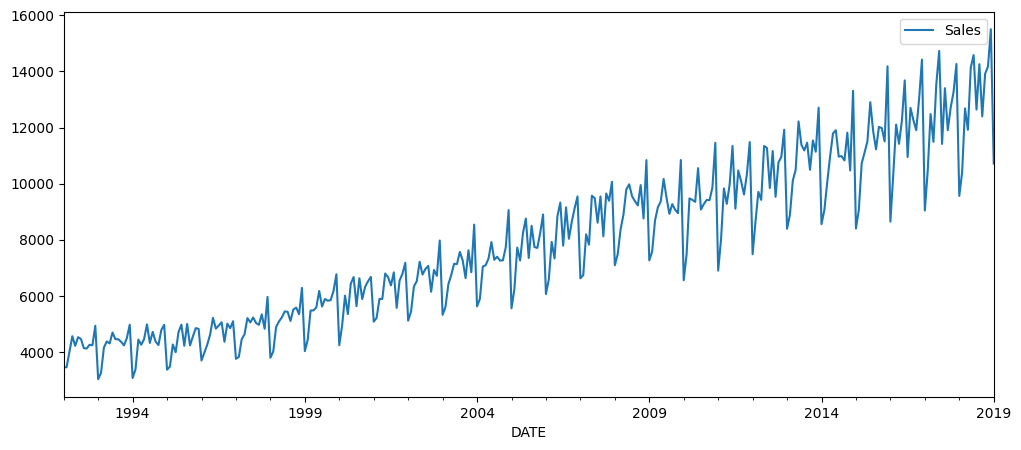

In [13]:
df.plot()

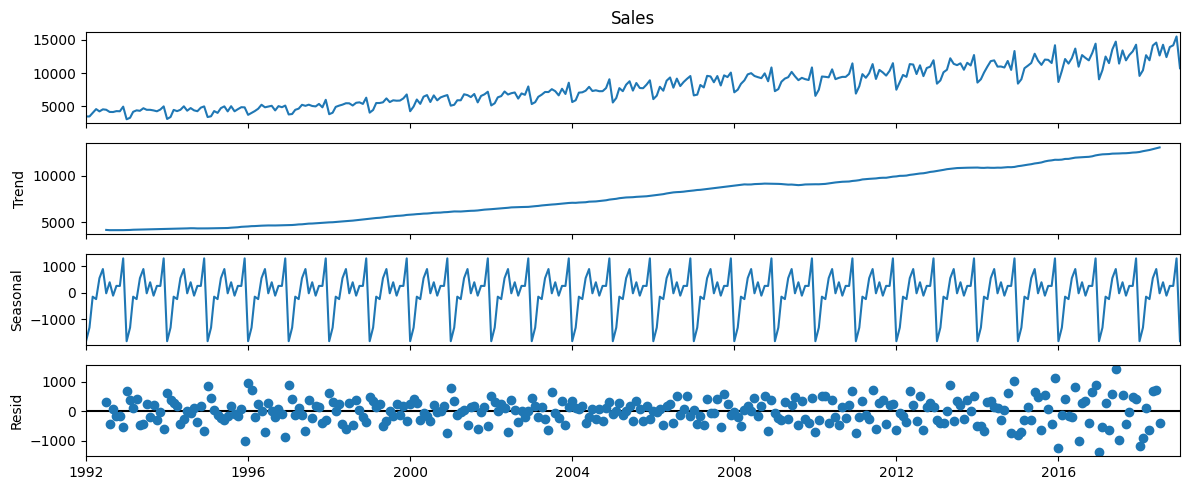

In [14]:
results = seasonal_decompose(df['Sales'])
results.plot();

In [16]:
nobs = 12
train = df.iloc[:-nobs]
test = df.iloc[-nobs:]

In [17]:
scaler = MinMaxScaler()
scaler.fit(train)

train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

In [39]:
n_input = 12
n_features = 1
train_generator = TimeseriesGenerator(train_scaled, train_scaled, length=n_input, batch_size=1)

In [40]:
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 150)               91200     
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit_generator(train_generator, epochs=25)

Epoch 1/25


<ipython-input-42-698d8e58e24d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, epochs=25)


301/301 [==============================] - 6s 14ms/step - loss: 0.0150
Epoch 2/25
301/301 [==============================] - 3s 10ms/step - loss: 0.0103
Epoch 3/25
301/301 [==============================] - 3s 10ms/step - loss: 0.0097
Epoch 4/25
301/301 [==============================] - 4s 12ms/step - loss: 0.0080
Epoch 5/25
301/301 [==============================] - 3s 10ms/step - loss: 0.0072
Epoch 6/25
301/301 [==============================] - 3s 11ms/step - loss: 0.0061
Epoch 7/25
301/301 [==============================] - 3s 9ms/step - loss: 0.0044
Epoch 8/25
301/301 [==============================] - 3s 10ms/step - loss: 0.0038
Epoch 9/25
301/301 [==============================] - 3s 10ms/step - loss: 0.0032
Epoch 10/25
301/301 [==============================] - 3s 10ms/step - loss: 0.0022
Epoch 11/25
301/301 [==============================] - 3s 10ms/step - loss: 0.0024
Epoch 12/25
301/301 [==============================] - 3s 9ms/step - loss: 0.0020
Epoch 13/25
301/301 [=====

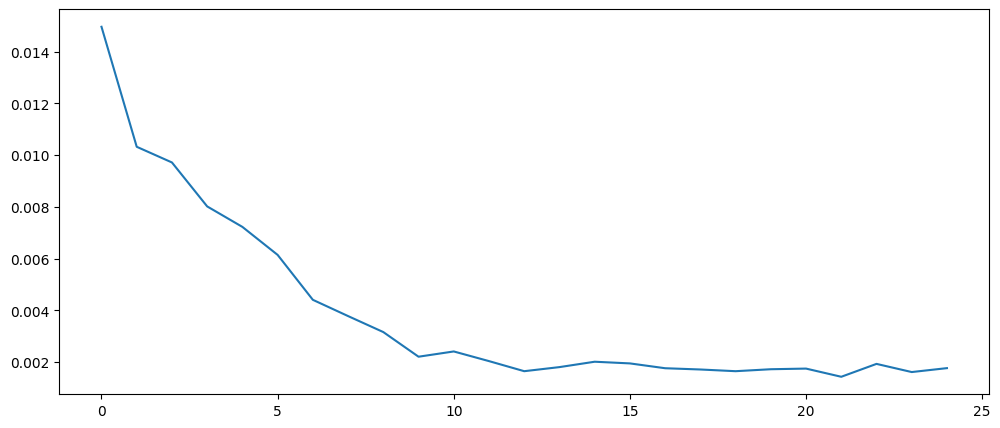

In [43]:
plt.plot(
    range(len(model.history.history['loss'])),
    model.history.history['loss']
);

In [44]:
first_eval_batch = train_scaled[-n_input:].reshape((1,n_input,n_features))

In [45]:
 model.predict(first_eval_batch)

1/1 [==============================] - 0s 181ms/step


array([[0.78634816]], dtype=float32)

In [46]:
test_predictions = []
current_batch = first_eval_batch
for i in range(len(test_scaled)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:, 1:,:], [[current_pred]], axis = 1)



1/1 [==============================] - 0s 36ms/step


In [47]:
true_preds = scaler.inverse_transform(test_predictions)
test['Predicitons'] = true_preds

<ipython-input-47-c2d351d11ddd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predicitons'] = true_preds


<Axes: xlabel='DATE'>

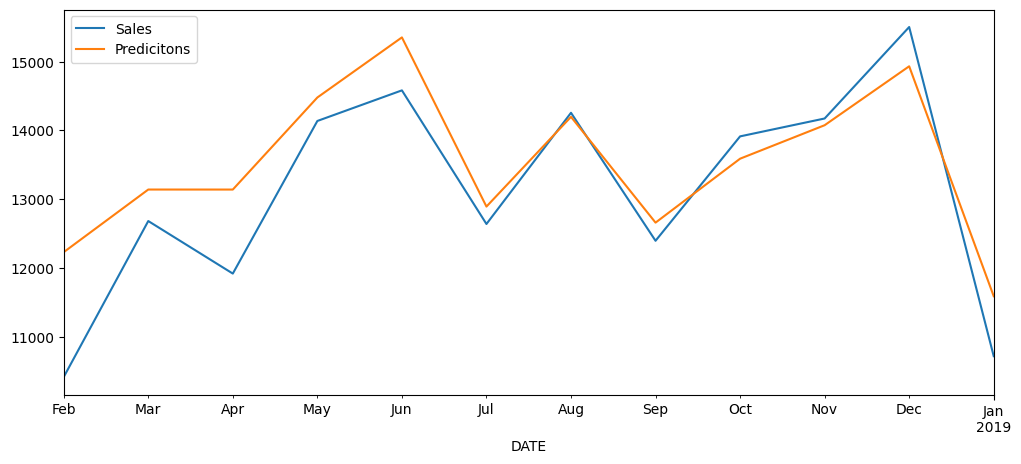

In [48]:
test.plot()